## Importing the required libraries

In [ ]:
import numpy as np 
import pandas as pd

## Loading the Data set

In [ ]:
df_train = pd.read_csv('housing_train (1).csv')

Deleting columns with missing data

In [ ]:
df_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], axis = 1,inplace=True)

Drop rows with missing data

In [ ]:
df_train.dropna(inplace=True)

Splitting train and test data

In [ ]:
from sklearn.model_selection import train_test_split
df_train = pd.get_dummies(df_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'SalePrice'], df_train['SalePrice'], test_size=0.25, random_state=42)


## PCA(Principal component analysis)

In [ ]:
from sklearn.decomposition import PCA

def pca_dec(data, n):
  pca = PCA(n)
  X_dec = pca.fit_transform(data)
  return X_dec, pca

Decomposing the train set

In [ ]:
pca_train_results, pca_train = pca_dec(X_train, 10)

Decomposing the test set

In [ ]:
pca_test_results, pca_test = pca_dec(X_test, 10)

Creating a table with the explained variance ratio

In [ ]:
names_pcas = [f"PCA Component {i}" for i in range(1, 11, 1)]
scree = pd.DataFrame(list(zip(names_pcas, pca_train.explained_variance_ratio_)), columns=["Component", "Explained Variance Ratio"])
print(scree)

          Component  Explained Variance Ratio
0   PCA Component 1                  0.985988
1   PCA Component 2                  0.004436
2   PCA Component 3                  0.003187
3   PCA Component 4                  0.002591
4   PCA Component 5                  0.001587
5   PCA Component 6                  0.000903
6   PCA Component 7                  0.000401
7   PCA Component 8                  0.000240
8   PCA Component 9                  0.000189
9  PCA Component 10                  0.000181


Sorting the values of the first principal component by how large each one is

In [ ]:
df = pd.DataFrame({'PCA':pca_train.components_[0], 'Variable Names':list(X_train.columns)})
df = df.sort_values('PCA', ascending=False)

Sorting the absolute values of the first principal component by magnitude

In [ ]:
df2 = pd.DataFrame(df)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)
#print(df2['Variable Names'][0:11])

In [ ]:
df.head()

,PCA,Variable Names
2,0.999730,LotArea
15,0.013377,GrLivArea
12,0.011297,1stFlrSF
11,0.010933,TotalBsmtSF
8,0.009208,BsmtFinSF1


Creating Price Categories for TSNE and PCA Visualization

In [ ]:
def what_bracket(sale_price):
  if sale_price <=100000:
    return "Tier 1"
  elif sale_price <=200000:
    return "Tier 2"
  elif sale_price <=300000:
    return "Tier 3"
  elif sale_price <= 500000:
    return "Tier 4"
  else:
    return "Tier 5"

y_tiers = y_train.apply(what_bracket)

Plotting the first two PCA components, as well as the price tier of the house to see if PCA helps us distinguish price-points

Text(0, 0.5, 'PCA Component 2')

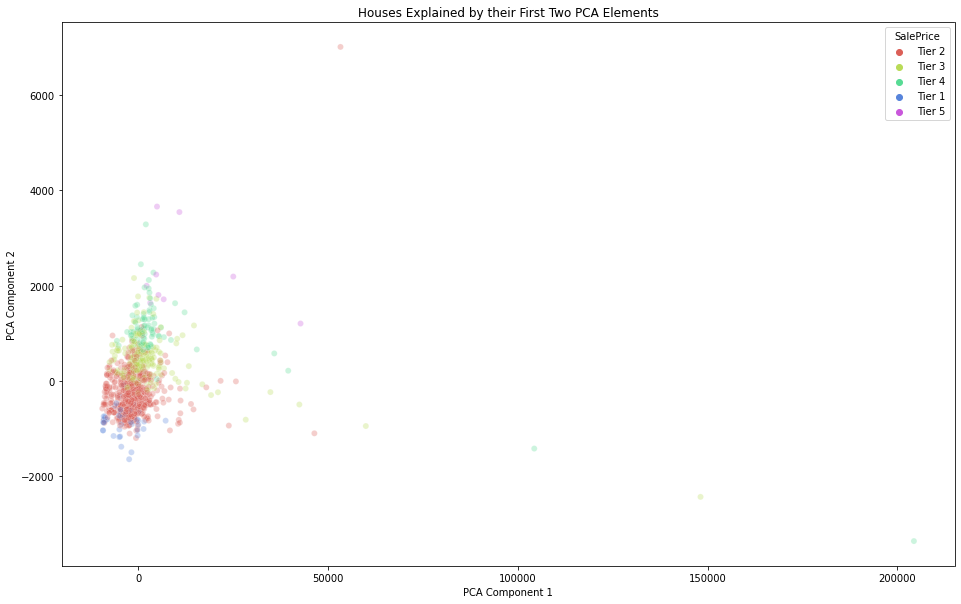

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

first_comps = pca_train_results[:,0] #Taking the first PCA component for each
                                    #decomposed house's data

second_comps = pca_train_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=first_comps, y=second_comps,
    hue=y_tiers,
    palette=sns.color_palette("hls", 5),
    legend="full",
    alpha=0.3
)

plt.title("Houses Explained by their First Two PCA Elements")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

## Applying linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin = LinearRegression()

In [ ]:
lin = lin.fit(X_train, y_train)

In [ ]:
y_pred = lin.predict(X_test)

In [ ]:
lin.intercept_

-1007292.2839460066

In [ ]:
y_test

832     237000
965     178900
969     140000
1411    140000
284     179200
         ...  
374     219500
337     214000
1233    142000
550     140000
1307    138000
Name: SalePrice, Length: 335, dtype: int64

In [ ]:
print(y_pred)

[231396.99564694 173123.8135358  159475.95801052 158269.88750329
 185181.86894546 131886.56517691 182661.60626317 223114.64212528
 268292.4326316  132563.59741332 175878.22028517 292614.5020237
 211996.6281008  129666.05458313 145613.39106197 193581.97427298
 105053.1396481  145055.79921158 233707.84037619  94362.08780187
 209842.61365707 186832.39142692 173628.43328674 238489.20159946
 263710.11389832 122076.59869995 175630.06066032 157426.84403913
 214646.69074883 154634.03080284 235182.82659983 178796.17261943
 276087.47318688 166846.86998127 312919.81176424 190095.76546528
 204950.20633236  50996.70286591 147154.38176365  82043.46562099
 183436.10531759 267146.38371702 246177.35331872 181035.86901222
 178613.89371581 241192.75622144 107807.81717976 163666.39304075
  44344.96403814 135826.53361719 139781.81756608 267174.1620719
 155493.13047312 213915.53683604 185969.28301868 152385.68889006
 174053.13334466 299750.77019948 135883.01199696 232133.66538885
 190790.93965476 155323.600

## Applying mean squared error



In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
r2_score = lin.score(X_train, y_train)

In [ ]:
print(mean_squared_error(y_test, y_pred))

1210502672.712685


In [ ]:
print(r2_score)

0.9468816127568922


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


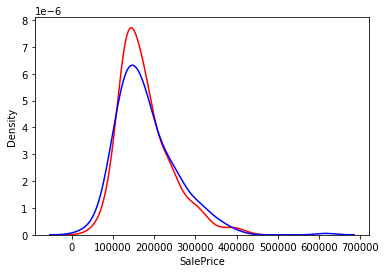

In [ ]:
#it counts the predicted value
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'Actual Values')
sns.distplot(y_pred, hist =False, color = 'b', label = 'Predicted values', ax = ax1)

## Regression plots

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


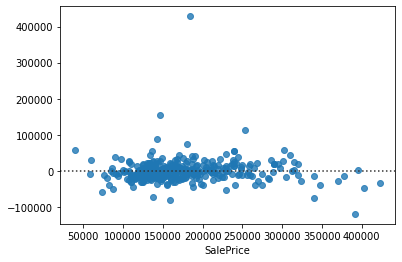

In [ ]:
sns.residplot(y_test, y_pred)